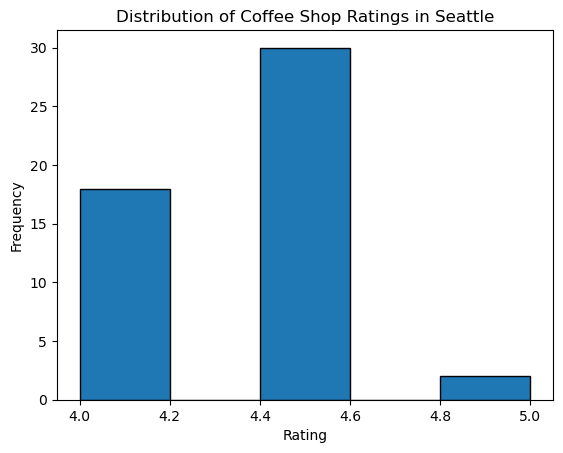

In [11]:




import requests
import matplotlib.pyplot as plt

API_KEY = "sdRuwHN_EkreQeWH0MyQWOcLz2HdIotLzXZOB33Viw0GyO0qOWs77muoMhz65bqx17MDWfoKTXnYc0AjV84kgUWGjx_m6tSWSGarnItiN72GFebZ50OnQ1YGrnpYZHYx"
ENDPOINT = "https://api.yelp.com/v3/businesses/search"

location = "Seattle"
category = "coffee"

params = {
    "location": location,
    "categories": category,
    "limit": 50  
}

headers = {
    "Authorization": f"Bearer {API_KEY}"
}

response = requests.get(ENDPOINT, params=params, headers=headers)
data = response.json()

ratings = [business["rating"] for business in data["businesses"]]

plt.hist(ratings, bins=5, edgecolor='black')
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Coffee Shop Ratings in Seattle")
plt.show()


In [12]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


     Rank                    Coffee Store Name  Rating Zipcode
0       1                   The Shop by Porter     5.0   98101
1       2  ʔálʔal Cafe - By Chief Seattle Club     5.0   98101
2       3                          The Dailies     5.0   98101
3       4                                FLEUR     5.0   98101
4       5              Overcast Coffee Company     5.0   98101
..    ...                                  ...     ...     ...
495    46                     Copper Tree Cafe     5.0   98110
496    47                     The Burnt Coffee     5.0   98110
497    48                             Cafe Red     5.0   98110
498    49                   Resistencia Coffee     5.0   98110
499    50                       Diore Espresso     5.0   98110

[500 rows x 4 columns]


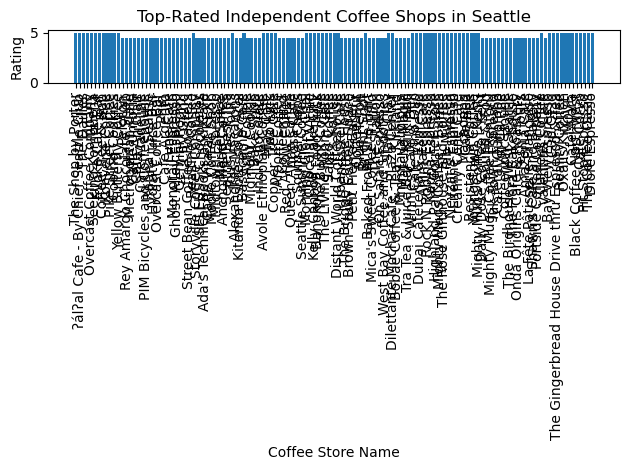

In [23]:
import requests
import matplotlib.pyplot as plt
import pandas as pd

API_KEY = "sdRuwHN_EkreQeWH0MyQWOcLz2HdIotLzXZOB33Viw0GyO0qOWs77muoMhz65bqx17MDWfoKTXnYc0AjV84kgUWGjx_m6tSWSGarnItiN72GFebZ50OnQ1YGrnpYZHYx"
ENDPOINT = "https://api.yelp.com/v3/businesses/search"

locations = [str(s) for s in range(98101,98111)]  

category = "coffee"

params = {
    "categories": category,
    "limit": 50, 
    "sort_by": "rating"  
}

headers = {
    "Authorization": f"Bearer {API_KEY}"
}

results = []

for location in locations:
    params["location"] = location

    response = requests.get(ENDPOINT, params=params, headers=headers)
    data = response.json()

    shops = []
    for i, business in enumerate(data["businesses"]):
        if business.get("rating") and business.get("review_count") and not business.get("chain"):
            rank = i + 1
            name = business["name"]
            zipcode =business["location"]
            rating = business["rating"]
            shops.append({"Rank": rank, "Coffee Store Name": name, "Rating": rating, "Zipcode": location})

    results.extend(shops)

df = pd.DataFrame(results)

print(df)

plt.bar(df["Coffee Store Name"], df["Rating"])
plt.xticks(rotation=90)
plt.xlabel("Coffee Store Name")
plt.ylabel("Rating")
plt.title("Top-Rated Independent Coffee Shops in Seattle")
plt.tight_layout()
plt.show()


In [2]:
import requests
import pandas as pd


API_KEY = "sdRuwHN_EkreQeWH0MyQWOcLz2HdIotLzXZOB33Viw0GyO0qOWs77muoMhz65bqx17MDWfoKTXnYc0AjV84kgUWGjx_m6tSWSGarnItiN72GFebZ50OnQ1YGrnpYZHYx"
ENDPOINT = "https://api.yelp.com/v3/businesses/search"


locations = [str(s) for s in range(98101, 98111)]  

category = "coffee"


params = {
    "categories": category,
    "limit": 50,  
    "sort_by": "rating"  
}

headers = {
    "Authorization": f"Bearer {API_KEY}"
}

results = []

for location in locations:
    params["location"] = location


    response = requests.get(ENDPOINT, params=params, headers=headers)
    data = response.json()

    for i, business in enumerate(data["businesses"]):
        if business.get("rating") and business.get("review_count") and not business.get("chain"):
            rank = i + 1
            name = business["name"]
            rating = business["rating"]
            results.append({"Rank": rank, "Coffee Store Name": name, "Rating": rating, "Zipcode": location})

df = pd.DataFrame(results)

tsv_file = "top_rated_coffee_shops.tsv"
df.to_csv(tsv_file, sep="\t", index=False)

print(f"Data saved to {tsv_file} successfully!")


Data saved to top_rated_coffee_shops.tsv successfully!


In [24]:
df.shape

(500, 4)

In [25]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [24]:
import requests
import folium

API_KEY = "sdRuwHN_EkreQeWH0MyQWOcLz2HdIotLzXZOB33Viw0GyO0qOWs77muoMhz65bqx17MDWfoKTXnYc0AjV84kgUWGjx_m6tSWSGarnItiN72GFebZ50OnQ1YGrnpYZHYx"
ENDPOINT = "https://api.yelp.com/v3/businesses/search"

locations = [str(s) for s in range(98101,98111)]  

category = "coffee"

params = {
    "categories": category,
    "limit": 50, 
    "sort_by": "rating"  
}


headers = {
    "Authorization": f"Bearer {API_KEY}"
}

seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)

for location in locations:

    params["location"] = location

   
    response = requests.get(ENDPOINT, params=params, headers=headers)
    data = response.json()


    for business in data["businesses"]:
        if business.get("location") and business.get("coordinates"):
            name = business["name"]
            latitude = business["coordinates"]["latitude"]
            longitude = business["coordinates"]["longitude"]
            popup = folium.Popup(name, parse_html=True)
            marker = folium.Marker(location=[latitude, longitude], popup=popup)
            marker.add_to(seattle_map)

seattle_map.save("combined.html")  

import folium
import requests

API_KEY = "sdRuwHN_EkreQeWH0MyQWOcLz2HdIotLzXZOB33Viw0GyO0qOWs77muoMhz65bqx17MDWfoKTXnYc0AjV84kgUWGjx_m6tSWSGarnItiN72GFebZ50OnQ1YGrnpYZHYx"
ENDPOINT = "https://api.yelp.com/v3/businesses/search"

locations = ["Seattle"]

params = {
    "term": "Starbucks",
    "categories": category,
    "limit": 50
}

headers = {
    "Authorization": f"Bearer {API_KEY}"
}

seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)  # Create a map object

for location in locations:
    params["location"] = location
    response = requests.get(ENDPOINT, params=params, headers=headers)
    data = response.json()

    for business in data["businesses"]:
        if business.get("location") and business.get("coordinates"):
            name = business["name"]
            latitude = business["coordinates"]["latitude"]
            longitude = business["coordinates"]["longitude"]
            popup = folium.Popup(name, parse_html=True)
            marker = folium.Marker(location=[latitude, longitude], popup=popup, icon=folium.Icon(color='green', icon_color='#00FF00'))
            marker.add_to(seattle_map)

seattle_map.save("combined.html")


In [11]:
import folium
import requests

API_KEY = "sdRuwHN_EkreQeWH0MyQWOcLz2HdIotLzXZOB33Viw0GyO0qOWs77muoMhz65bqx17MDWfoKTXnYc0AjV84kgUWGjx_m6tSWSGarnItiN72GFebZ50OnQ1YGrnpYZHYx"
ENDPOINT = "https://api.yelp.com/v3/businesses/search"

locations = ["Seattle"]

params = {
    "term": "Starbucks",
    "categories": category,
    "limit": 50
}

headers = {
    "Authorization": f"Bearer {API_KEY}"
}

seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)  # Create a map object

for location in locations:
    params["location"] = location
    response = requests.get(ENDPOINT, params=params, headers=headers)
    data = response.json()

    for business in data["businesses"]:
        if business.get("location") and business.get("coordinates"):
            name = business["name"]
            latitude = business["coordinates"]["latitude"]
            longitude = business["coordinates"]["longitude"]
            popup = folium.Popup(name, parse_html=True)
            marker = folium.Marker(location=[latitude, longitude], popup=popup, icon=folium.Icon(color='green', icon_color='#00FF00'))
            marker.add_to(seattle_map)

seattle_map.save("starbucks_map1.html")

In [13]:
import folium
import requests

API_KEY = "sdRuwHN_EkreQeWH0MyQWOcLz2HdIotLzXZOB33Viw0GyO0qOWs77muoMhz65bqx17MDWfoKTXnYc0AjV84kgUWGjx_m6tSWSGarnItiN72GFebZ50OnQ1YGrnpYZHYx"
ENDPOINT = "https://api.yelp.com/v3/businesses/search"

locations = ["Seattle"]

params = {
    "term": "Starbucks",
    "categories": category,
    "limit": 50
}

headers = {
    "Authorization": f"Bearer {API_KEY}"
}

seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)  # Create a map object

for location in locations:
    params["location"] = location
    response = requests.get(ENDPOINT, params=params, headers=headers)
    data = response.json()

    for business in data["businesses"]:
        if business.get("location") and business.get("coordinates"):
            name = business["name"]
            latitude = business["coordinates"]["latitude"]
            longitude = business["coordinates"]["longitude"]
            popup = folium.Popup(name, parse_html=True)
            marker = folium.Marker(location=[latitude, longitude], popup=popup, icon=folium.Icon(color='green', icon_color='#00FF00'))
            marker.add_to(seattle_map)

seattle_map.save("combined.html")

In [26]:
import requests
import folium

API_KEY = "sdRuwHN_EkreQeWH0MyQWOcLz2HdIotLzXZOB33Viw0GyO0qOWs77muoMhz65bqx17MDWfoKTXnYc0AjV84kgUWGjx_m6tSWSGarnItiN72GFebZ50OnQ1YGrnpYZHYx"
ENDPOINT = "https://api.yelp.com/v3/businesses/search"

locations = [str(s) for s in range(98101,98111)]  

category = "coffee"

# Set the parameters for the API request
params = {
    "categories": category,
    "limit": 50,  
    "sort_by": "rating"  # Sort the results by rating in descending order
}

# Set the headers with your API key
headers = {
    "Authorization": f"Bearer {API_KEY}"
}

seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)

for location in locations:
    params["location"] = location


    response = requests.get(ENDPOINT, params=params, headers=headers)
    data = response.json()

    for business in data["businesses"]:
        if business.get("location") and business.get("coordinates"):
            name = business["name"]
            latitude = business["coordinates"]["latitude"]
            longitude = business["coordinates"]["longitude"]
            popup = folium.Popup(name, parse_html=True)
            marker = folium.Marker(location=[latitude, longitude], popup=popup)
            marker.add_to(seattle_map)
            

seattle_map.save("FINAL.html")

In [27]:
import requests
import folium

API_KEY = "sdRuwHN_EkreQeWH0MyQWOcLz2HdIotLzXZOB33Viw0GyO0qOWs77muoMhz65bqx17MDWfoKTXnYc0AjV84kgUWGjx_m6tSWSGarnItiN72GFebZ50OnQ1YGrnpYZHYx"
ENDPOINT = "https://api.yelp.com/v3/businesses/search"

locations = [str(s) for s in range(98101,98111)] 

category = "coffee"          
            
params = {
    "term": "Starbucks",
    "categories": category,
    "limit": 50
}

headers = {
    "Authorization": f"Bearer {API_KEY}"
}

seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)  # Create a map object

for location in locations:
    params["location"] = location
    response = requests.get(ENDPOINT, params=params, headers=headers)
    data = response.json()

    for business in data["businesses"]:
        if business.get("location") and business.get("coordinates"):
            name = business["name"]
            latitude = business["coordinates"]["latitude"]
            longitude = business["coordinates"]["longitude"]
            popup = folium.Popup(name, parse_html=True)
            marker = folium.Marker(location=[latitude, longitude], popup=popup, icon=folium.Icon(color='green', icon_color='#00FF00'))
            marker.add_to(seattle_map)

seattle_map.save("FINAL.html")

In [28]:
import requests
import folium

API_KEY = "sdRuwHN_EkreQeWH0MyQWOcLz2HdIotLzXZOB33Viw0GyO0qOWs77muoMhz65bqx17MDWfoKTXnYc0AjV84kgUWGjx_m6tSWSGarnItiN72GFebZ50OnQ1YGrnpYZHYx"
ENDPOINT = "https://api.yelp.com/v3/businesses/search"

locations = [str(s) for s in range(98101,98111)]  

category = "coffee"          
            
params = {
    "term": "Starbucks",
    "categories": category,
    "limit": 50
}

headers = {
    "Authorization": f"Bearer {API_KEY}"
}

seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12) 

for location in locations:
    params["location"] = location
    response = requests.get(ENDPOINT, params=params, headers=headers)
    data = response.json()

    for business in data["businesses"]:
        if business.get("location") and business.get("coordinates"):
            name = business["name"]
            latitude = business["coordinates"]["latitude"]
            longitude = business["coordinates"]["longitude"]
            popup = folium.Popup(name, parse_html=True)
            marker = folium.Marker(location=[latitude, longitude], popup=popup, icon=folium.Icon(color='green', icon_color='#00FF00'))
            marker.add_to(seattle_map)

seattle_map.save("FINAL.html")

category = "coffee"

params = {
    "categories": category,
    "limit": 50, 
    "sort_by": "rating"  
}

headers = {
    "Authorization": f"Bearer {API_KEY}"
}

for location in locations:
    params["location"] = location

    response = requests.get(ENDPOINT, params=params, headers=headers)
    data = response.json()


    for business in data["businesses"]:
        if business.get("location") and business.get("coordinates"):
            name = business["name"]
            latitude = business["coordinates"]["latitude"]
            longitude = business["coordinates"]["longitude"]
            popup = folium.Popup(name, parse_html=True)
            marker = folium.Marker(location=[latitude, longitude], popup=popup)
            marker.add_to(seattle_map)
            

seattle_map.save("FINAL.html")

In [37]:
import requests
import folium

API_KEY = "sdRuwHN_EkreQeWH0MyQWOcLz2HdIotLzXZOB33Viw0GyO0qOWs77muoMhz65bqx17MDWfoKTXnYc0AjV84kgUWGjx_m6tSWSGarnItiN72GFebZ50OnQ1YGrnpYZHYx"
ENDPOINT = "https://api.yelp.com/v3/businesses/search"

locations = [str(s) for s in range(98101, 98111)] 

category = "coffee"

starbucks_params = {
    "term": "Starbucks",
    "categories": category,

}

coffee_params = {
    "categories": category,
    "sort_by": "rating"  
}

headers = {
    "Authorization": f"Bearer {API_KEY}"
}

seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)  

for location in locations:
    starbucks_params["location"] = location

    response = requests.get(ENDPOINT, params=starbucks_params, headers=headers)
    data = response.json()

    for business in data["businesses"]:
        if business.get("location") and business.get("coordinates"):
            name = business["name"]
            latitude = business["coordinates"]["latitude"]
            longitude = business["coordinates"]["longitude"]
            popup = folium.Popup(name, parse_html=True)
            marker = folium.Marker(location=[latitude, longitude], popup=popup, icon=folium.Icon(color='green', icon_color='#00FF00'))
            marker.add_to(seattle_map)

for location in locations:
    coffee_params["location"] = location

    response = requests.get(ENDPOINT, params=coffee_params, headers=headers)
    data = response.json()

    for business in data["businesses"]:
        if business.get("location") and business.get("coordinates"):
            name = business["name"]
            latitude = business["coordinates"]["latitude"]
            longitude = business["coordinates"]["longitude"]
            popup = folium.Popup(name, parse_html=True)
            marker = folium.Marker(location=[latitude, longitude], popup=popup, icon=folium.Icon(color='blue', icon_color='#00FF00'))
            marker.add_to(seattle_map)

            
seattle_map.save("FINAL.html")


     Rank                    Coffee Store Name  Rating  Weighted Rating  \
0       1                                FLEUR     5.0         3.706897   
1       2  ʔálʔal Cafe - By Chief Seattle Club     5.0         3.846154   
2       3                        Basecamp Cafe     5.0         3.636364   
3       4                   The Shop by Porter     5.0         3.828125   
4       5                          The Dailies     5.0         3.660714   
..    ...                                  ...     ...              ...   
495    46                 Bangkok99 Food Truck     5.0         4.292453   
496    47                     Copper Tree Cafe     5.0         4.000000   
497    48                     The Burnt Coffee     5.0         3.636364   
498    49                             Cafe Red     5.0         4.471831   
499    50                   Resistencia Coffee     5.0         4.423077   

    Zipcode  
0     98101  
1     98101  
2     98101  
3     98101  
4     98101  
..      ...  
4

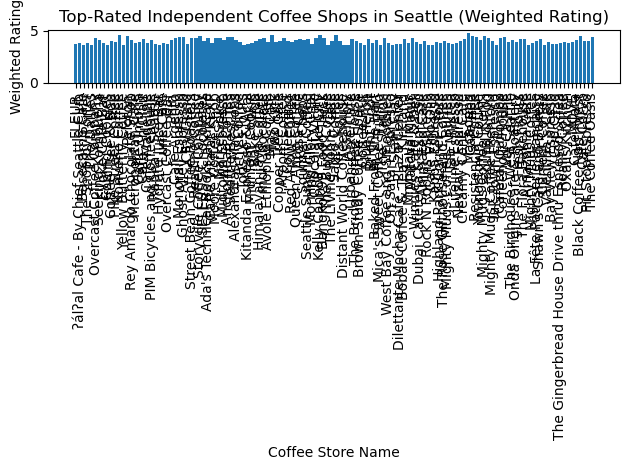

In [38]:
import requests
import matplotlib.pyplot as plt
import pandas as pd

API_KEY = "sdRuwHN_EkreQeWH0MyQWOcLz2HdIotLzXZOB33Viw0GyO0qOWs77muoMhz65bqx17MDWfoKTXnYc0AjV84kgUWGjx_m6tSWSGarnItiN72GFebZ50OnQ1YGrnpYZHYx"
ENDPOINT = "https://api.yelp.com/v3/businesses/search"


locations = [str(s) for s in range(98101, 98111)]  

category = "coffee"

params = {
    "categories": category,
    "limit": 50,  
    "sort_by": "rating"  
}

headers = {
    "Authorization": f"Bearer {API_KEY}"
}

results = []

for location in locations:
    params["location"] = location

    response = requests.get(ENDPOINT, params=params, headers=headers)
    data = response.json()

    shops = []
    for i, business in enumerate(data["businesses"]):
        if business.get("rating") and business.get("review_count") and not business.get("chain"):
            rank = i + 1
            name = business["name"]
            zipcode = business["location"]
            rating = business["rating"]
            review_count = business["review_count"]
            weighted_rating = (review_count / (review_count + 50)) * rating + (50 / (review_count + 50)) * 3.5
            shops.append({
                "Rank": rank,
                "Coffee Store Name": name,
                "Rating": rating,
                "Weighted Rating": weighted_rating,
                "Zipcode": location
            })

    results.extend(shops)

df = pd.DataFrame(results)

print(df)

plt.bar(df["Coffee Store Name"], df["Weighted Rating"])
plt.xticks(rotation=90)
plt.xlabel("Coffee Store Name")
plt.ylabel("Weighted Rating")
plt.title("Top-Rated Independent Coffee Shops in Seattle (Weighted Rating)")
plt.tight_layout()
plt.show()


In [39]:
import requests
import pandas as pd

# Set up your Yelp API credentials and endpoint
API_KEY = "sdRuwHN_EkreQeWH0MyQWOcLz2HdIotLzXZOB33Viw0GyO0qOWs77muoMhz65bqx17MDWfoKTXnYc0AjV84kgUWGjx_m6tSWSGarnItiN72GFebZ50OnQ1YGrnpYZHYx"
ENDPOINT = "https://api.yelp.com/v3/businesses/search"

# Set the zip codes or neighborhoods in Seattle
locations = [str(s) for s in range(98101, 98111)]  # Add more zip codes or neighborhoods as needed

# Set the category for coffee shops
category = "coffee"

# Set the parameters for the API request
params = {
    "categories": category,
    "limit": 50,  
    "sort_by": "rating"  
}


headers = {
    "Authorization": f"Bearer {API_KEY}"
}


results = []


for location in locations:
    
    params["location"] = location
    
    response = requests.get(ENDPOINT, params=params, headers=headers)
    data = response.json()

    shops = []
    for i, business in enumerate(data["businesses"]):
        if business.get("rating") and business.get("review_count") and not business.get("chain"):
            rank = i + 1
            name = business["name"]
            zipcode = business["location"]
            rating = business["rating"]
            review_count = business["review_count"]
            weighted_rating = (review_count / (review_count + 50)) * rating + (50 / (review_count + 50)) * 3.5
            shops.append({
                "Rank": rank,
                "Coffee Store Name": name,
                "Rating": rating,
                "Weighted Rating": weighted_rating,
                "Zipcode": location
            })

    results.extend(shops)

# Create a DataFrame to store the extracted information
df = pd.DataFrame(results)

# Save the DataFrame to a TSV file
df.to_csv("coffee_shops.tsv", sep="\t", index=False)

print("Data saved to coffee_shops.tsv")


Data saved to coffee_shops.tsv


In [41]:
import requests
import pandas as pd

API_KEY = "sdRuwHN_EkreQeWH0MyQWOcLz2HdIotLzXZOB33Viw0GyO0qOWs77muoMhz65bqx17MDWfoKTXnYc0AjV84kgUWGjx_m6tSWSGarnItiN72GFebZ50OnQ1YGrnpYZHYx"
ENDPOINT = "https://api.yelp.com/v3/businesses/search"

locations = [str(s) for s in range(98101, 98111)]  

category = "coffee"

params = {
    "categories": category,
    "sort_by": "rating" 
}

headers = {
    "Authorization": f"Bearer {API_KEY}"
}

results = []

for location in locations:
    params["location"] = location

    response = requests.get(ENDPOINT, params=params, headers=headers)
    data = response.json()

    shops = []
    for i, business in enumerate(data["businesses"]):
        if business.get("rating") and business.get("review_count") and not business.get("chain"):
            rank = i + 1
            name = business["name"]
            zipcode = business["location"]
            rating = business["rating"]
            review_count = business["review_count"]
            weighted_rating = (review_count / (review_count + 50)) * 3.5 + (50 / (review_count + 50)) * 70
            shops.append({
                "Rank": rank,
                "Coffee Store Name": name,
                "Rating": rating,
                "Review Count": review_count,
                "Weighted Rating": weighted_rating,
                "Zipcode": location
            })

    results.extend(shops)

df = pd.DataFrame(results)

df.to_csv("coffee_shops.tsv", sep="\t", index=False)

print("Data saved to coffee_shops.tsv")


Data saved to coffee_shops.tsv


In [44]:
import requests
import pandas as pd

API_KEY = "sdRuwHN_EkreQeWH0MyQWOcLz2HdIotLzXZOB33Viw0GyO0qOWs77muoMhz65bqx17MDWfoKTXnYc0AjV84kgUWGjx_m6tSWSGarnItiN72GFebZ50OnQ1YGrnpYZHYx"
ENDPOINT = "https://api.yelp.com/v3/businesses/search"

locations = [str(s) for s in range(98101, 98111)]  
category = "coffee"

params = {
    "categories": category,
    "sort_by": "rating"  
}

headers = {
    "Authorization": f"Bearer {API_KEY}"
}

results = []

for location in locations:
    params["location"] = location

    response = requests.get(ENDPOINT, params=params, headers=headers)
    data = response.json()

    shops = []
    for i, business in enumerate(data["businesses"]):
        if business.get("rating") and business.get("review_count") and not business.get("chain"):
            rank = i + 1
            name = business["name"]
            zipcode = business["location"]
            rating = business["rating"]
            review_count = business["review_count"]
            weighted_rating = (review_count / (review_count + 50)) * rating + (50 / (review_count + 50)) * 3.5
            shops.append({
                "Rank": rank,
                "Coffee Store Name": name,
                "Rating": rating,
                "Review Count": review_count,
                "Weighted Rating": weighted_rating,
                "Zipcode": location
            })


    results.extend(shops)

results = sorted(results, key=lambda x: x["Weighted Rating"], reverse=True)

df = pd.DataFrame(results)

df.to_csv("ranked_coffee_shops.tsv", sep="\t", index=False)

print("Data saved to coffee_shops.tsv")


Data saved to coffee_shops.tsv


In [49]:
import requests
import pandas as pd

API_KEY = "sdRuwHN_EkreQeWH0MyQWOcLz2HdIotLzXZOB33Viw0GyO0qOWs77muoMhz65bqx17MDWfoKTXnYc0AjV84kgUWGjx_m6tSWSGarnItiN72GFebZ50OnQ1YGrnpYZHYx"
ENDPOINT = "https://api.yelp.com/v3/businesses/search"

locations = [str(s) for s in range(98101, 98111)]  

category = "coffee"

params = {
    "categories": category,
    "sort_by": "rating",  
    "term": "Starbucks"
}

headers = {
    "Authorization": f"Bearer {API_KEY}"
}

results = []

for location in locations:
    params["location"] = location

    response = requests.get(ENDPOINT, params=params, headers=headers)
    data = response.json()

    shops = []
    for i, business in enumerate(data["businesses"]):
        if business.get("rating") and business.get("review_count") and not business.get("chain"):
            rank = i + 1
            name = business["name"]
            zipcode = business["location"]
            rating = business["rating"]
            review_count = business["review_count"]
            weighted_rating = (review_count / (review_count + 50)) * rating + (50 / (review_count + 50)) * 3.5
            shops.append({
                "Rank": rank,
                "Coffee Store Name": name,
                "Rating": rating,
                "Review Count": review_count,
                "Weighted Rating": weighted_rating,
                "Zipcode": location
            })

    results.extend(shops)

results = sorted(results, key=lambda x: x["Weighted Rating"], reverse=True)

df = pd.DataFrame(results)

df.to_csv("ranked_starbucks_shops.tsv", sep="\t", index=False)
